#Customer classification

In [41]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from google.colab import runtime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, precision_score, recall_score, f1_score

In [3]:
#Mounting our google drive on google colab to access our data files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load the dataset
filepath1 = '/content/drive/MyDrive/digital-transformation-in-banking-sector/Data/dataset1.csv'
filepath2 = '/content/drive/MyDrive/digital-transformation-in-banking-sector/Data/dataset2.csv'
cust_data1=pd.read_csv(filepath1)
cust_data2 = pd.read_csv(filepath2)
display(cust_data1.head(5))
display(cust_data2.head(5))

ID  Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
0   1   25              1            49    91107            4   
1   2   45             19            34    90089            3   
2   3   39             15            11    94720            1   
3   4   35              9           100    94112            1   
4   5   35              8            45    91330            4   

   MonthlyAverageSpend  Level  
0                  1.6      1  
1                  1.5      1  
2                  1.0      1  
3                  2.7      2  
4                  1.0      2

ID  Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
0   1         0         1                    0                0           0   
1   2         0         1                    0                0           0   
2   3         0         0                    0                0           0   
3   4         0         0                    0                0           0   
4   5         0         0                    0                0           1   

   LoanOnCard  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [5]:
if(cust_data1.shape[0] == cust_data2.shape[0]):
  cust_data=cust_data1.merge(cust_data2, how='inner', on='ID') # Merging datasets
else:
  print('Data cannot be merged')
  runtime.unassign()

In [6]:
#shape of our fnal sataframe
cust_data.shape

(5000, 14)

In [7]:
#check data types
cust_data.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [8]:
cust_data.describe()

ID          Age  CustomerSince  HighestSpend       ZipCode  \
count  5000.000000  5000.000000    5000.000000   5000.000000   5000.000000   
mean   2500.500000    45.338400      20.104600     73.774200  93152.503000   
std    1443.520003    11.463166      11.467954     46.033729   2121.852197   
min       1.000000    23.000000      -3.000000      8.000000   9307.000000   
25%    1250.750000    35.000000      10.000000     39.000000  91911.000000   
50%    2500.500000    45.000000      20.000000     64.000000  93437.000000   
75%    3750.250000    55.000000      30.000000     98.000000  94608.000000   
max    5000.000000    67.000000      43.000000    224.000000  96651.000000   

       HiddenScore  MonthlyAverageSpend        Level     Mortgage  \
count  5000.000000          5000.000000  5000.000000  5000.000000   
mean      2.396400             1.937938     1.881000    56.498800   
std       1.147663             1.747659     0.839869   101.713802   
min       1.000000             0.000000     1.000000     0.000000   
25%       1.000000             0.700000     1.000000     0.000000   
50%       2.000000             1.500000     2.000000     0.000000   
75%       3.000000             2.500000     3.000000   101.000000   
max       4.000000            10.000000     3.000000   635.000000   

          Security  FixedDepositAccount  InternetBanking   CreditCard  \
count  5000.000000           5000.00000      5000.000000  5000.000000   
mean      0.104400              0.06040         0.596800     0.294000   
std       0.305809              0.23825         0.490589     0.455637   
min       0.000000              0.00000         0.000000     0.000000   
25%       0.000000              0.00000         0.000000     0.000000   
50%       0.000000              0.00000         1.000000     0.000000   
75%       0.000000              0.00000         1.000000     1.000000   
max       1.000000              1.00000         1.000000     1.000000   

        LoanOnCard  
count  4980.000000  
mean      0.096386  
std       0.295149  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

In [9]:
# Check for null value
cust_data.isnull().sum()

ID                      0
Age                     0
CustomerSince           0
HighestSpend            0
ZipCode                 0
HiddenScore             0
MonthlyAverageSpend     0
Level                   0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

Target column LoanOnCard has some missing rows which can be dropped as missing values constitute to 0.4% & Id column does not contain any significant information so we can drop it

In [10]:
#drop null values & ID column
cust_data = cust_data.dropna()
cust_data = cust_data.drop(['ID'], axis = 1)

In [11]:
cust_data.head()

Age  CustomerSince  HighestSpend  ZipCode  HiddenScore  \
9    34              9           180    93023            1   
10   65             39           105    94710            4   
11   29              5            45    90277            3   
12   48             23           114    93106            2   
13   59             32            40    94920            4   

    MonthlyAverageSpend  Level  Mortgage  Security  FixedDepositAccount  \
9                   8.9      3         0         0                    0   
10                  2.4      3         0         0                    0   
11                  0.1      2         0         0                    0   
12                  3.8      3         0         1                    0   
13                  2.5      2         0         0                    0   

    InternetBanking  CreditCard  LoanOnCard  
9                 0           0         1.0  
10                0           0         0.0  
11                1           0         0.0  
12                0           0         0.0  
13                1           0         0.0

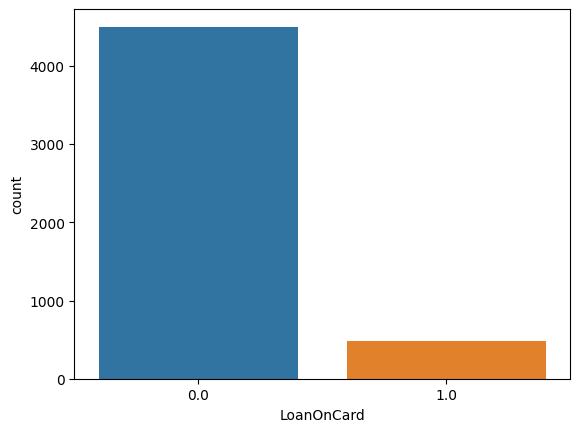

In [12]:
# Understand data distribution as per target class.
sns.countplot(x = 'LoanOnCard',  data = cust_data);

In [13]:
#calculate %age distribution of target class
count_1 = len(cust_data[cust_data['LoanOnCard'] == 1.0])
count_0 = len(cust_data[cust_data['LoanOnCard'] == 0.0])
print(f"Number of borrowers: {count_1} ({((count_1 / (count_1 + count_0)) * 100 )}%)")
print(f"Number of depositors: {count_0} ({((count_0 / (count_1 + count_0)) * 100)}%)")

Number of borrowers: 480 (9.63855421686747%)
Number of depositors: 4500 (90.36144578313254%)


As it can be observed ourdataset is highly imbalanced towards depositors.

<Axes: xlabel='HighestSpend', ylabel='MonthlyAverageSpend'>

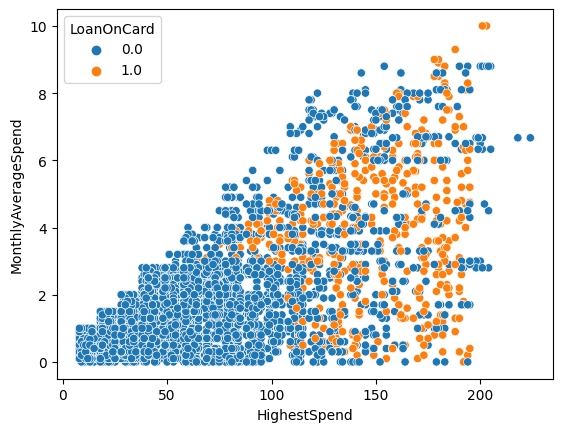

In [14]:
# Scatter plot to see how data points are distributed for "MonthlyAverageSpend" and "HighestSpend" as per target class
sns.scatterplot(x="HighestSpend", y="MonthlyAverageSpend", hue="LoanOnCard",
             data=cust_data,legend='full')
#g.set(xscale="log")

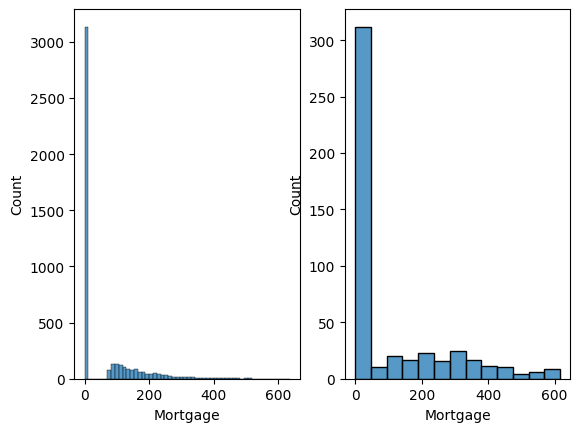

In [15]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'Mortgage'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'Mortgage'], ax = ax[1])
plt.show()

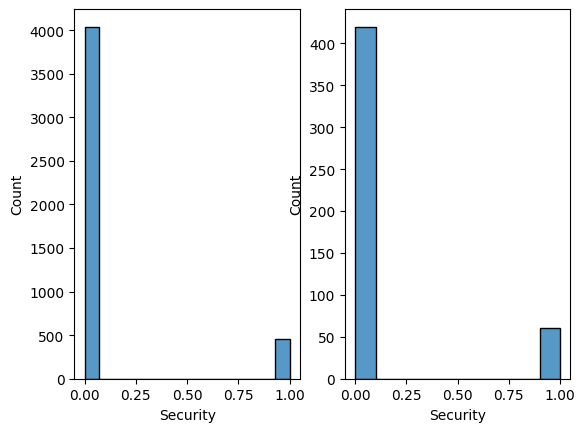

In [16]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'Security'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'Security'], ax = ax[1])
plt.show()

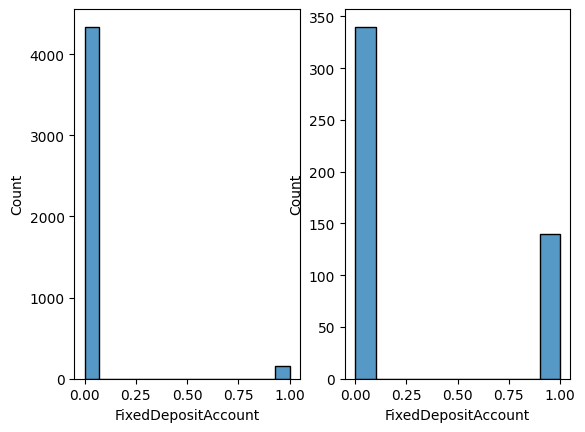

In [17]:
fig, ax = plt.subplots(1, 2)
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 0.0, 'FixedDepositAccount'], ax = ax[0])
sns.histplot(cust_data.loc[cust_data.LoanOnCard == 1.0, 'FixedDepositAccount'], ax = ax[1])
plt.show()

In the above histplots we can ignore bins at 0.00 values as it means that depositors/borrowers do not have Mortgage/Security/Fixed deposit with the bank

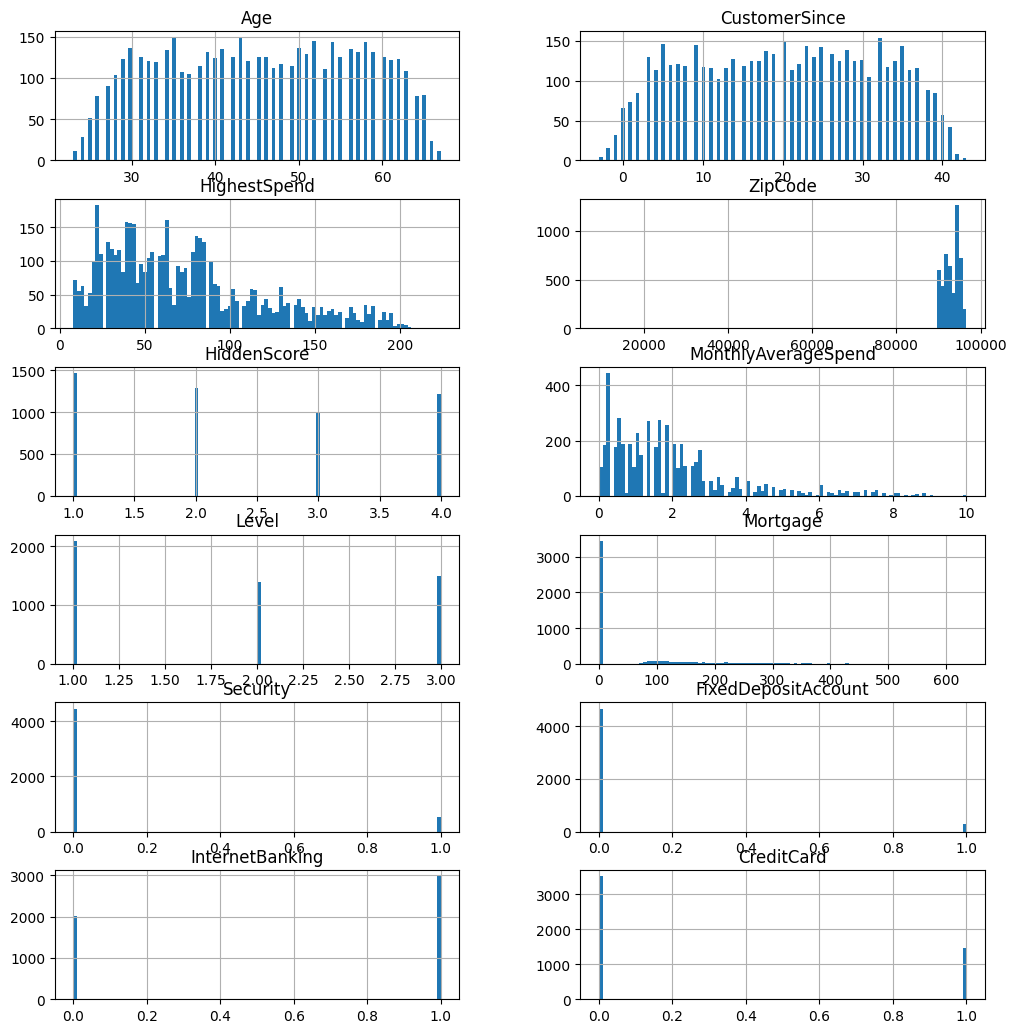

In [18]:
#Understand the bank customers by the features in our dataset(excuding target column)
columns = list(cust_data)[0:-1]
cust_data[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2));

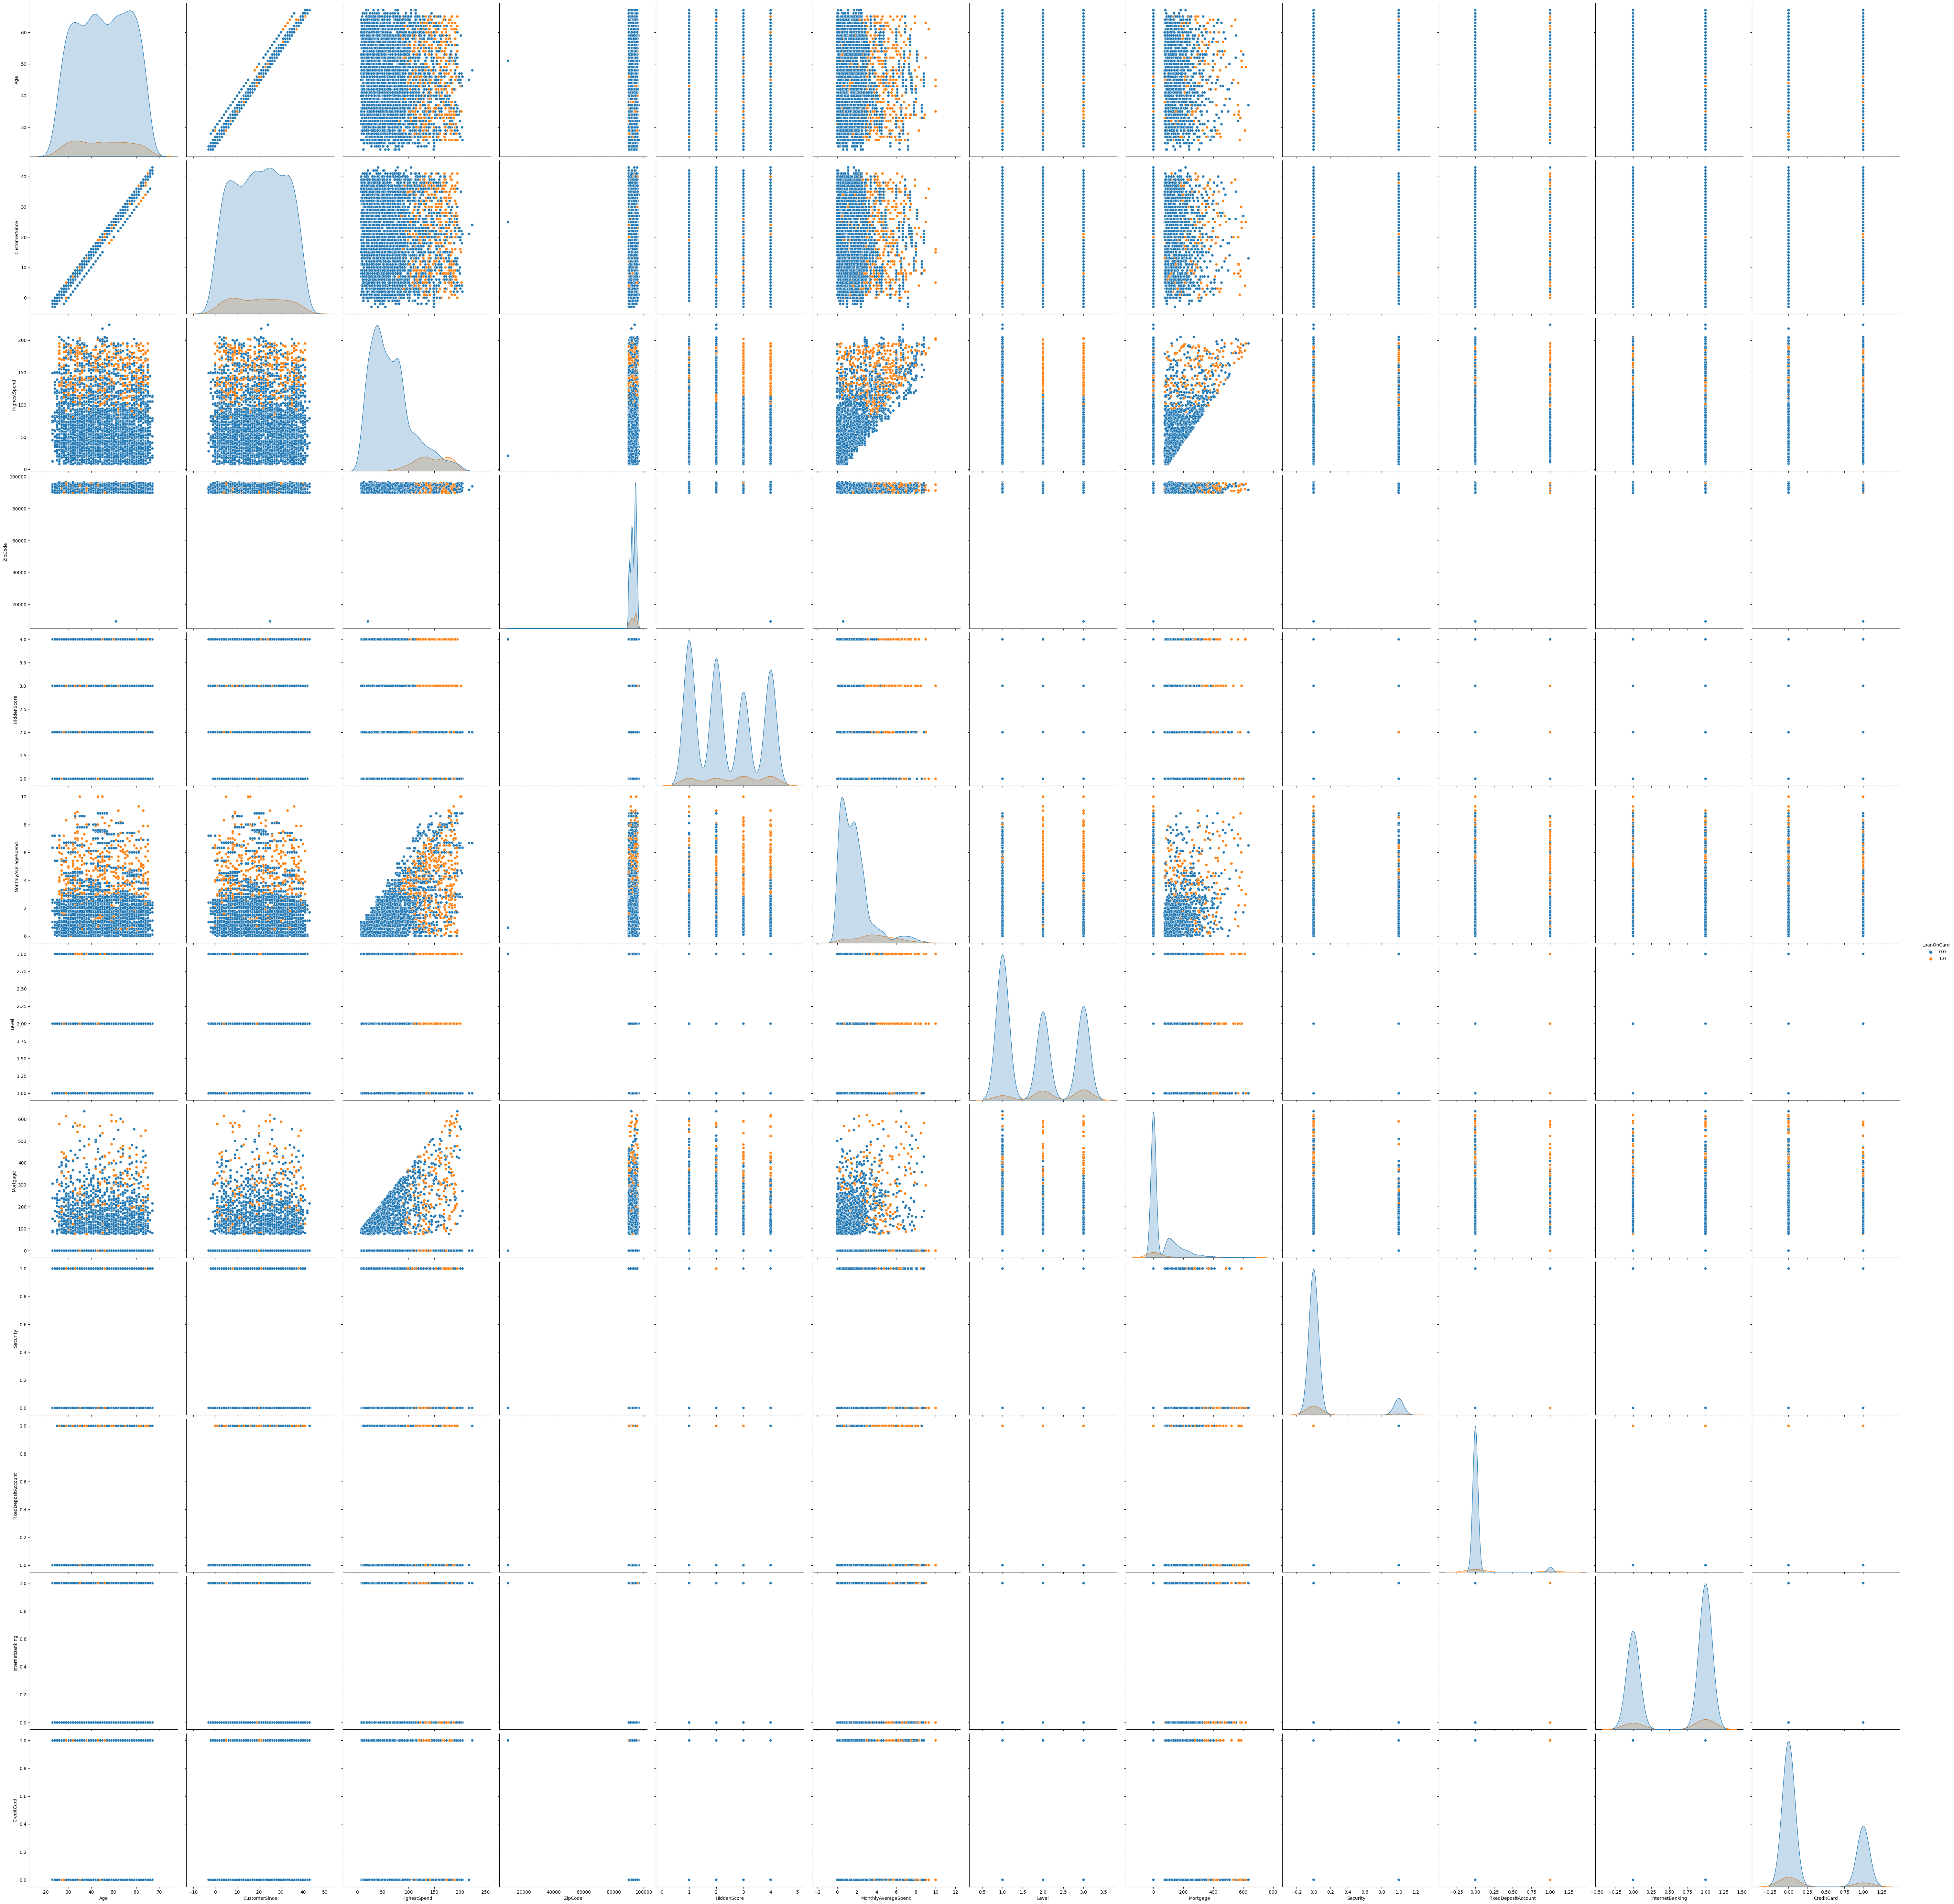

In [25]:
#creating pairplot to understand the pairwise relationships in a dataset
sns.pairplot(cust_data, height=5, hue = 'LoanOnCard')

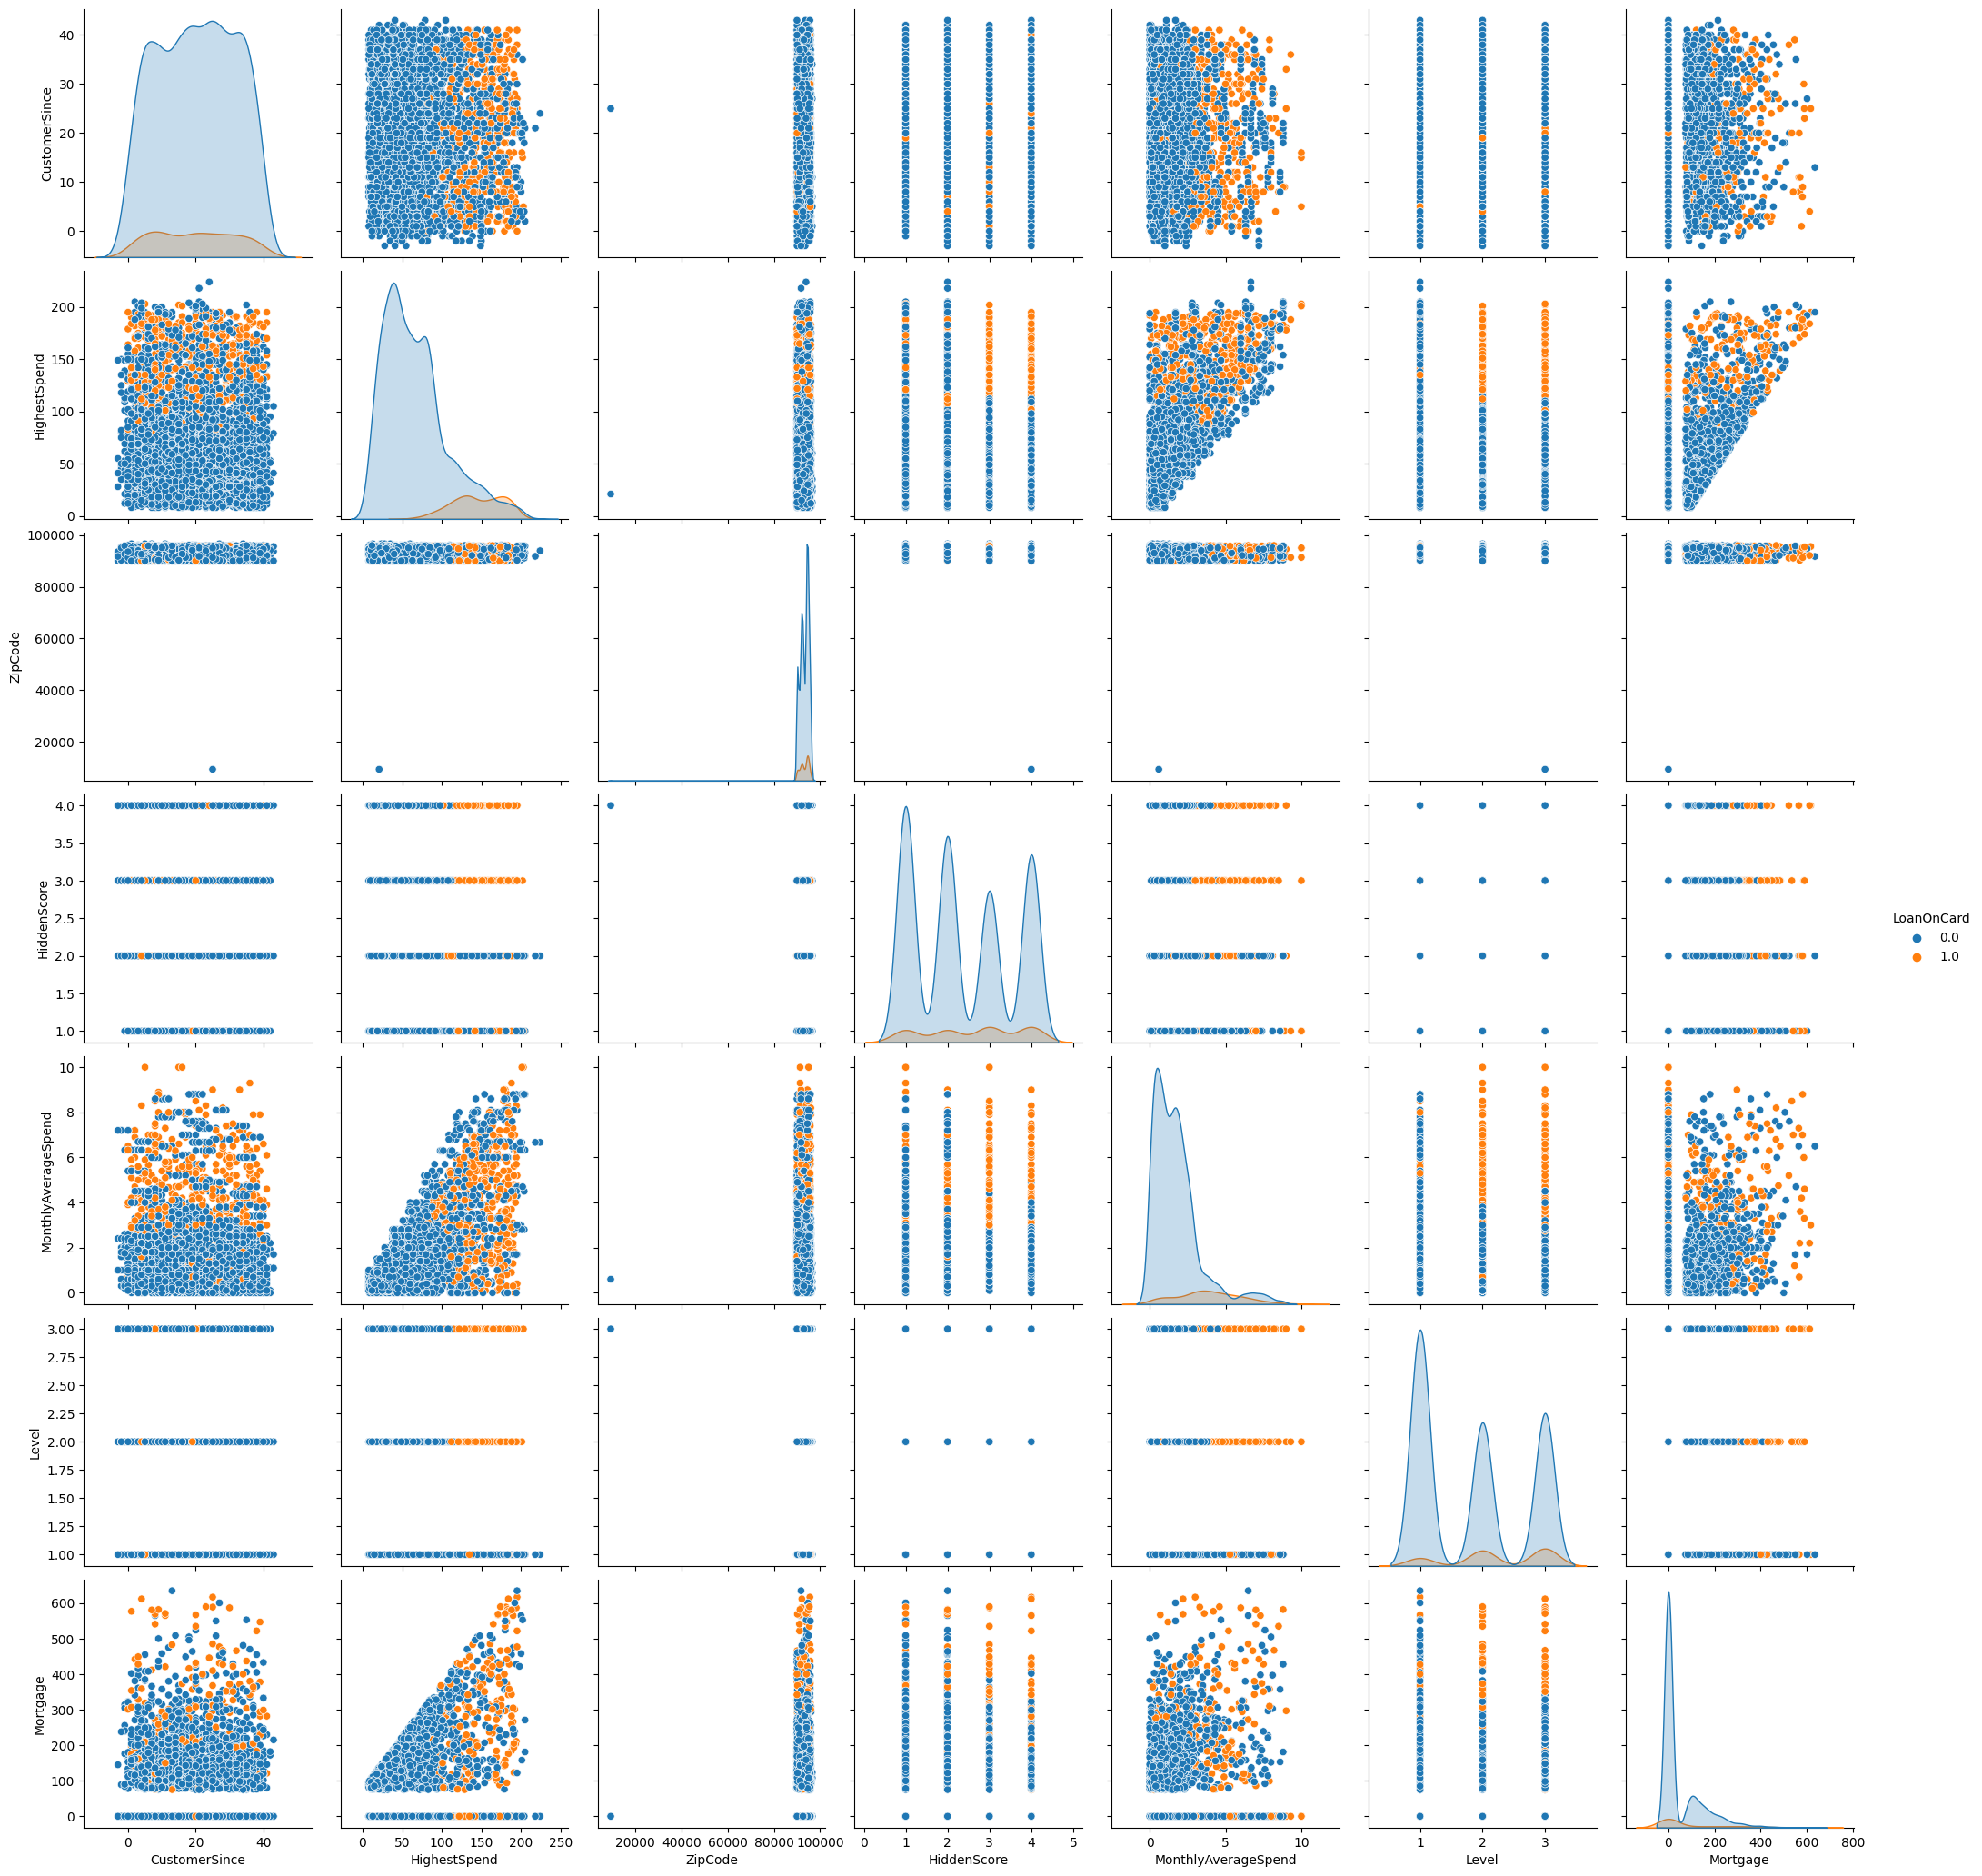

In [23]:
sns.pairplot(cust_data.iloc[:,[1,2,3,4,5,6,7,-1]], height=3, hue = 'LoanOnCard')

From the aboveplots we can see that zipcode doesn't have any significance with other dependent variables and target variable, let's confirm it with correlation

In [31]:
#Correlation analysis
corr = cust_data.corr()
corr

Age  CustomerSince  HighestSpend   ZipCode  \
Age                  1.000000       0.994208     -0.054951 -0.029939   
CustomerSince        0.994208       1.000000     -0.046092 -0.029415   
HighestSpend        -0.054951      -0.046092      1.000000 -0.016447   
ZipCode             -0.029939      -0.029415     -0.016447  1.000000   
HiddenScore         -0.045289      -0.051456     -0.158357  0.012250   
MonthlyAverageSpend -0.051896      -0.049918      0.646109 -0.004339   
Level                0.042750       0.014545     -0.188909 -0.017274   
Mortgage            -0.013272      -0.011380      0.207236  0.007214   
Security             0.000323      -0.000469     -0.002284  0.006312   
FixedDepositAccount  0.007744       0.010085      0.169535  0.020007   
InternetBanking      0.011227       0.011355      0.014202  0.017186   
CreditCard           0.007344       0.008779     -0.002780  0.007302   
LoanOnCard          -0.008147      -0.007801      0.502626  0.000120   

                     HiddenScore  MonthlyAverageSpend     Level  Mortgage  \
Age                    -0.045289            -0.051896  0.042750 -0.013272   
CustomerSince          -0.051456            -0.049918  0.014545 -0.011380   
HighestSpend           -0.158357             0.646109 -0.188909  0.207236   
ZipCode                 0.012250            -0.004339 -0.017274  0.007214   
HiddenScore             1.000000            -0.109180  0.065762 -0.021396   
MonthlyAverageSpend    -0.109180             1.000000 -0.137020  0.110275   
Level                   0.065762            -0.137020  1.000000 -0.032863   
Mortgage               -0.021396             0.110275 -0.032863  1.000000   
Security                0.019061             0.015105 -0.009443 -0.005002   
FixedDepositAccount     0.014327             0.136410  0.013982  0.089167   
InternetBanking         0.010900            -0.003475 -0.014556 -0.007044   
CreditCard              0.010784            -0.006577 -0.011766 -0.007600   
LoanOnCard              0.061761             0.366912  0.137010  0.141947   

                     Security  FixedDepositAccount  InternetBanking  \
Age                  0.000323             0.007744         0.011227   
CustomerSince       -0.000469             0.010085         0.011355   
HighestSpend        -0.002284             0.169535         0.014202   
ZipCode              0.006312             0.020007         0.017186   
HiddenScore          0.019061             0.014327         0.010900   
MonthlyAverageSpend  0.015105             0.136410        -0.003475   
Level               -0.009443             0.013982        -0.014556   
Mortgage            -0.005002             0.089167        -0.007044   
Security             1.000000             0.317673         0.014007   
FixedDepositAccount  0.317673             1.000000         0.176082   
InternetBanking      0.014007             0.176082         1.000000   
CreditCard          -0.014518             0.278924         0.004960   
LoanOnCard           0.021982             0.316131         0.006034   

                     CreditCard  LoanOnCard  
Age                    0.007344   -0.008147  
CustomerSince          0.008779   -0.007801  
HighestSpend          -0.002780    0.502626  
ZipCode                0.007302    0.000120  
HiddenScore            0.010784    0.061761  
MonthlyAverageSpend   -0.006577    0.366912  
Level                 -0.011766    0.137010  
Mortgage              -0.007600    0.141947  
Security              -0.014518    0.021982  
FixedDepositAccount    0.278924    0.316131  
InternetBanking        0.004960    0.006034  
CreditCard             1.000000    0.002536  
LoanOnCard             0.002536    1.000000

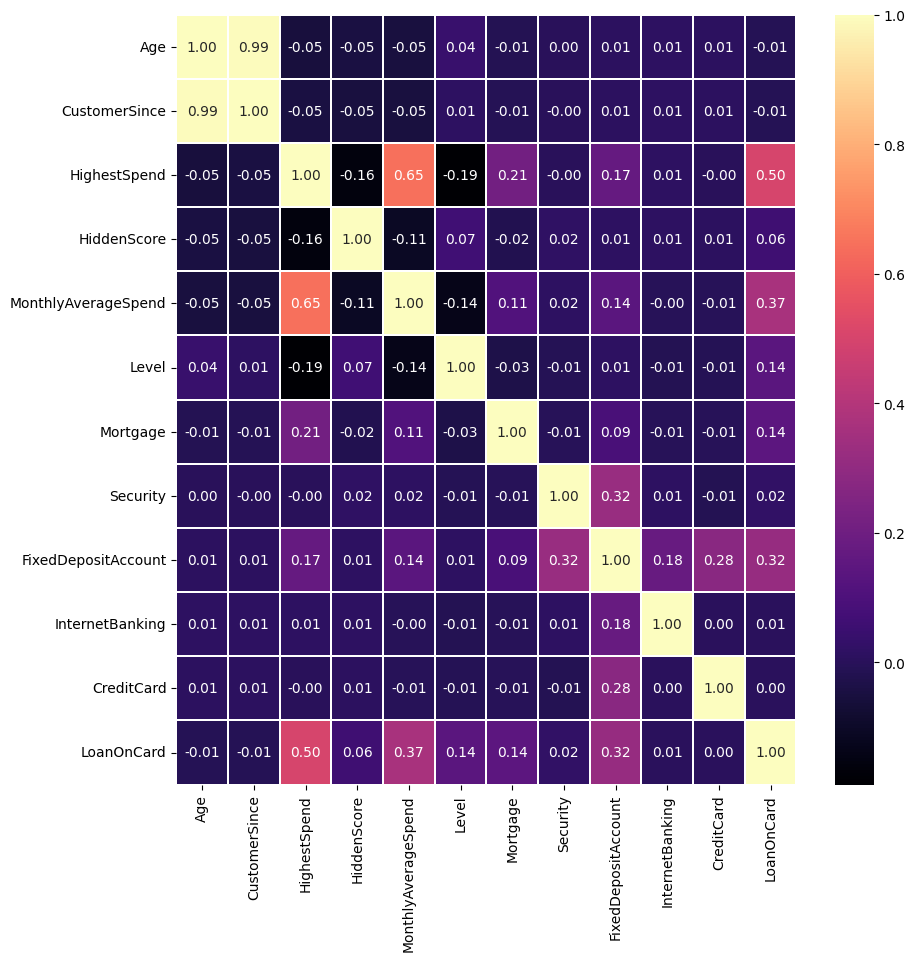

In [34]:
#plot the heatmap
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(cust_data.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma")
plt.show()

Apart from ZipCode bearing no significant information for our model learning we can aslo observe that Age & CustomeSince are highly Correlated so we can go ahead & drop one

In [ ]:
#drop the ZipCode column
cust_data.drop(['Age', 'ZipCode'], axis = 1, inplace = True)

In [36]:
cust_data.head(5)

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  Level  \
9    34              9           180            1                  8.9      3   
10   65             39           105            4                  2.4      3   
11   29              5            45            3                  0.1      2   
12   48             23           114            2                  3.8      3   
13   59             32            40            4                  2.5      2   

    Mortgage  Security  FixedDepositAccount  InternetBanking  CreditCard  \
9          0         0                    0                0           0   
10         0         0                    0                0           0   
11         0         0                    0                1           0   
12         0         1                    0                0           0   
13         0         0                    0                1           0   

    LoanOnCard  
9          1.0  
10         0.0  
11         0.0  
12         0.0  
13         0.0

Splitting Data

In [39]:
X = cust_data.drop('LoanOnCard',axis=1)
Y = cust_data['LoanOnCard']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=11)

In [40]:
display(x_train.head())
display(x_test.head())

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  \
69     53             29            20            4                  0.2   
1746   62             36            25            3                  0.3   
1129   30              4            73            3                  3.3   
4303   45             21           134            2                  3.3   
2721   58             33           173            2                  7.2   

      Level  Mortgage  Security  FixedDepositAccount  InternetBanking  \
69        1         0         0                    0                1   
1746      3         0         0                    0                1   
1129      1         0         0                    1                1   
4303      1         0         0                    0                1   
2721      3         0         0                    0                1   

      CreditCard  
69             0  
1746           1  
1129           1  
4303           1  
2721           0

Age  CustomerSince  HighestSpend  HiddenScore  MonthlyAverageSpend  \
3819   57             27            50            4                  2.0   
2136   50             26           115            1                  1.2   
2590   46             20           152            1                  7.4   
2660   39             14            74            1                  0.1   
3512   46             20            70            4                  2.9   

      Level  Mortgage  Security  FixedDepositAccount  InternetBanking  \
3819      3         0         0                    0                1   
2136      3         0         0                    0                0   
2590      3       374         0                    1                1   
2660      2       144         1                    0                1   
3512      1         0         0                    0                0   

      CreditCard  
3819           0  
2136           1  
2590           1  
2660           0  
3512           1

### Model Building phase

In [ ]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)


In [43]:
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3         4         5         6  \
0 -0.382149  0.380662  0.051033  0.585769  0.082606  1.689271 -0.000006   

          7         8         9        10  intercept  
0 -0.735765  3.064561 -0.659369 -0.934618  -2.726229  


In [44]:
model_score = model.score(x_test, y_test)
print(f'Model Score: {model_score}')

Model Score: 0.9497991967871486


In [45]:
# check the performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9497991967871486
Confusion Matrix: 
[[884   9]
 [ 41  62]]
Area Under Curve: 0.7959316800574043
Recall score: 0.6019417475728155
Precision score: 0.8732394366197183
f1 score: 0.7126436781609194


### For minority class, the above model is able to predict 62 correctly, out of 103. Although the accuracy is high, and model doesn't seem to be a good model. let's try an approach of 'weighted Logistic Regression to handle the unbalanced data

In [46]:
# define class weights
w = {0:1, 1:2}

# Fit the model on train
model_weighted = LogisticRegression(solver="liblinear", class_weight=w)
model_weighted.fit(x_train, y_train)
#predict on test
y_predict = model_weighted.predict(x_test)

In [47]:
# check the performance
print(f'Accuracy Score: {accuracy_score(y_test,y_predict)}')
print(f'Confusion Matrix: \n{confusion_matrix(y_test, y_predict)}')
print(f'Area Under Curve: {roc_auc_score(y_test, y_predict)}')
print(f'Recall score: {recall_score(y_test,y_predict)}')
print(f'Precision score: {precision_score(y_test,y_predict)}')
print(f'f1 score: {f1_score(y_test,y_predict)}')

Accuracy Score: 0.9497991967871486
Confusion Matrix: 
[[872  21]
 [ 29  74]]
Area Under Curve: 0.847465182269866
Recall score: 0.7184466019417476
Precision score: 0.7789473684210526
f1 score: 0.7474747474747476


#### Although the accuracy decreases, AUC and recall increases significantly, hence, it is a better model. Hence we will prefer "model_weighted".

##References:

1.https://towardsdatascience.com/seaborn-pairplot-enhance-your-data-understanding-with-a-single-plot-bf2f44524b22
2.